## Multi-modal LLM

### Salesforce/blip

In [1]:
# https://huggingface.co/Salesforce/blip-image-captioning-base

import requests
from PIL import Image
from transformers import BlipProcessor, BlipForConditionalGeneration

processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/287 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/506 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/990M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/990M [00:00<?, ?B/s]

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
import os
# folder path
folder_path = '/content/drive/MyDrive/llms-images'
#os.listdir("/content/drive/MyDrive")

In [24]:
# loop through files (this model is better)

from tqdm import tqdm

text = "a picture of"

caption_list = []
for filename in tqdm(os.listdir(folder_path), desc="Processing images"):
  img_path = os.path.join(folder_path, filename)
  raw_image = Image.open(img_path).convert('RGB')
  inputs = processor(raw_image, text, return_tensors="pt")
  out = model.generate(**inputs)
  caption = processor.decode(out[0], skip_special_tokens=True)
  caption_list.append(caption)

Processing images: 100%|██████████| 209/209 [21:26<00:00,  6.16s/it]


In [25]:
caption_list

['a picture of a man sitting on a swing',
 'a picture of a baby in a green shirt',
 'a picture of a man sitting at a desk with a laptop and holding a cup',
 "a picture of a monkey with a capt that reads, when you ' reting your friends '",
 'a picture of a man sitting on a swing',
 'a picture of a baby in a green shirt',
 'a picture of a skeleton sitting on a bench',
 'a picture of a girl in front of a fire',
 'a picture of a batman slappinging a woman',
 'a picture of a baby in a green shirt',
 'a picture of a man sitting on a swing',
 'a picture of a man sitting at a desk with a laptop and holding a cup',
 "a picture of a monkey with a capt that reads, when you ' reting your friends '",
 'a picture of a man sitting on a swing',
 'a picture of a baby in a green shirt',
 'a picture of a skeleton sitting on a bench',
 'a picture of a girl in front of a fire',
 'a picture of a batman slappinging a woman',
 'a picture of a baby in a green shirt',
 'a picture of a man sitting on a swing',
 

In [ ]:
# og code (disregard)

img = "C:\\Users\\ashle\\Downloads\\LLM Project Data\\2.jpg"
raw_image = Image.open(img).convert('RGB')

# conditional image captioning
text = "a picture of"
inputs = processor(raw_image, text, return_tensors="pt")

out = model.generate(**inputs)
print(processor.decode(out[0], skip_special_tokens=True))
# >>> a photography of a woman and her dog

# unconditional image captioning
# inputs = processor(raw_image, return_tensors="pt")

# out = model.generate(**inputs)
# print(processor.decode(out[0], skip_special_tokens=True))

a picture of a pirate running through the water


### Cnmoro

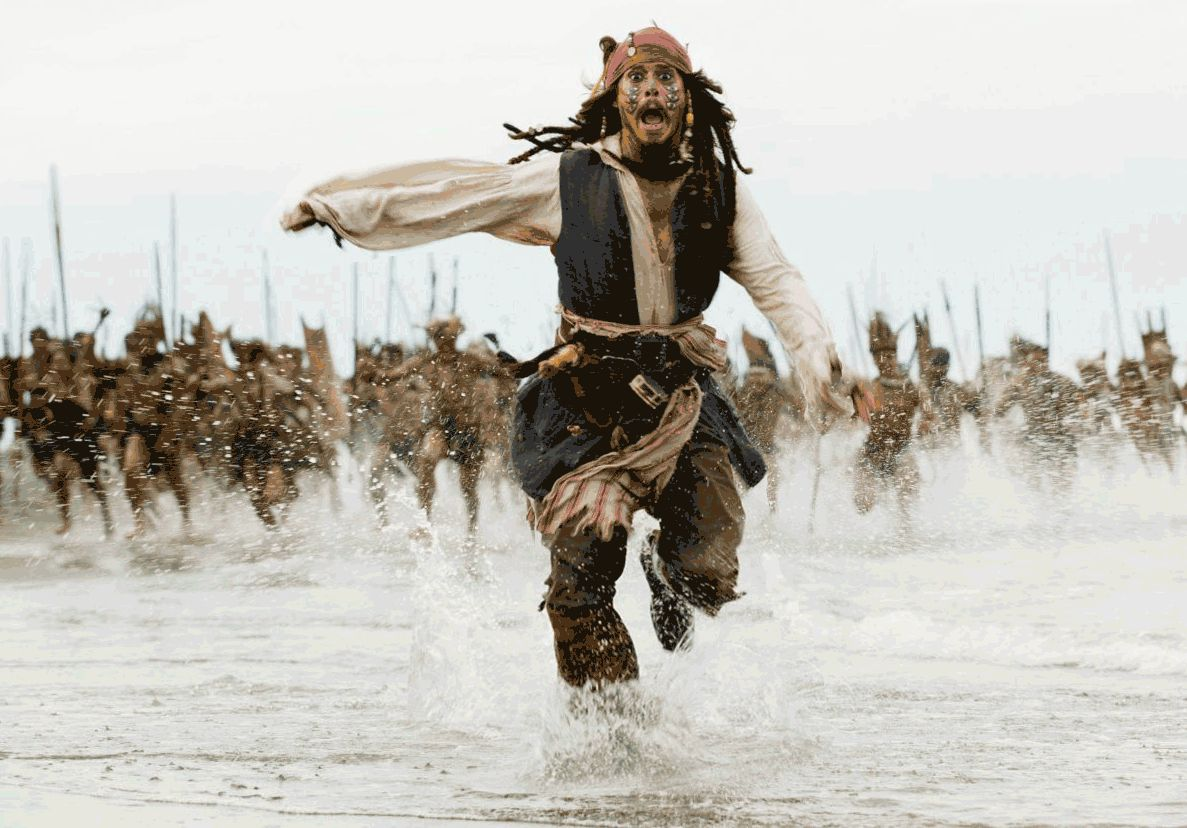

In [28]:
from PIL import Image
import requests, time
url = "https://i.imgflip.com/10471l.jpg"
image = Image.open(requests.get(url, stream=True).raw)
image

In [30]:
from transformers import AutoTokenizer, AutoImageProcessor, VisionEncoderDecoderModel
import requests, time
from PIL import Image

model_path = "cnmoro/tiny-image-captioning"

# Load the image captioning model and corresponding tokenizer and image processor
model = VisionEncoderDecoderModel.from_pretrained(model_path)
tokenizer = AutoTokenizer.from_pretrained(model_path)
image_processor = AutoImageProcessor.from_pretrained(model_path)

# Preprocess an image
url = "https://i.imgflip.com/10471l.jpg"
image = Image.open(requests.get(url, stream=True).raw)
pixel_values = image_processor(image, return_tensors="pt").pixel_values

start = time.time()

# Generate caption - suggested settings
generated_ids = model.generate(
    pixel_values,
    temperature=0.7,
    top_p=0.8,
    top_k=50,
    num_beams=1  # you can use 1 for even faster inference with a small drop in quality
)
generated_text = tokenizer.batch_decode(generated_ids, skip_special_tokens=True)[0]

end = time.time()

print(generated_text)
print(f"Time taken: {end - start} seconds")

config.json:   0%|          | 0.00/4.40k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/106M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/117 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.27k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/712k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/325 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
/usr/local/lib/python3.11/dist-packages/transformers/generation/configuration_utils.py:631: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.7` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/generation/configuration_utils.py:636: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.8` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(
We strongly recommend passing in an `attention_mask` since your input_id

a man is jumping in the water.
Time taken: 0.44861698150634766 seconds


In [32]:
# all files

from tqdm import tqdm

text = "a picture of"

caption_list_cnmoro = []
for filename in tqdm(os.listdir(folder_path), desc="Processing images"):
  img_path = os.path.join(folder_path, filename)
  raw_image = Image.open(img_path).convert('RGB')
  pixel_values = image_processor(raw_image, return_tensors="pt").pixel_values
  generated_ids = model.generate(
    pixel_values,
    temperature=0.7,
    top_p=0.8,
    top_k=50,
    num_beams=1  # you can use 1 for even faster inference with a small drop in quality
    )
  generated_text = tokenizer.batch_decode(generated_ids, skip_special_tokens=True)[0]
  caption_list_cnmoro.append(generated_text)

Processing images:   0%|          | 0/209 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/transformers/generation/configuration_utils.py:631: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.7` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/generation/configuration_utils.py:636: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.8` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(
Processing images: 100%|██████████| 209/209 [01:52<00:00,  1.86it/s]


In [33]:
caption_list_cnmoro

['a man is sitting on a bench.',
 'a child is sitting on a wooden floor.',
 'a man is sitting on a table.',
 'a man with a red shirt and white shirt is sitting on a bench.',
 'a man is sitting on a bench.',
 'a child is sitting on a wooden floor.',
 'a man with a red jacket is sitting on a wooden floor.',
 'a girl is walking in the air.',
 'a man is sitting on a stone wall.',
 'a child is sitting on a wooden floor.',
 'a man is sitting on a bench.',
 'a man is sitting on a table.',
 'a man with a red shirt and white shirt is sitting on a bench.',
 'a man is sitting on a bench.',
 'a child is sitting on a wooden floor.',
 'a man with a red jacket is sitting on a wooden floor.',
 'a girl is walking in the air.',
 'a man is sitting on a stone wall.',
 'a child is sitting on a wooden floor.',
 'a man is sitting on a bench.',
 'a man is sitting on a table.',
 'a man with a red shirt and white shirt is sitting on a bench.',
 'a man is sitting on a bench.',
 'a child is sitting on a wooden fl